# 1)Criação de duas matrizes de tamanho 3x3 a partir de números aleatórios entre 0 e 1 e multiplicação das mesmas.

In [ ]:
#Instalação de bibliotecas
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install kneed
!pip install nbconvert

In [1]:
#Importação de bibliotecas
import numpy as np
import random

In [2]:
#Criação de duas matrizes de tamanho 3x3 a partir de números aleatórios 
A = np.random.rand(3,3)
B = np.random.rand(3,3)
print(A)
print('--------------------------------------')
print(B)

[[0.9247637  0.84202072 0.31745716]
 [0.68254078 0.68908333 0.79840718]
 [0.96723434 0.17068849 0.30103859]]
--------------------------------------
[[0.83334057 0.36550787 0.19593279]
 [0.44312971 0.35077793 0.02377275]
 [0.55835949 0.56156865 0.07456141]]


In [3]:
#Multiplicação das duas matrizes
print(A*B)

[[0.77064311 0.3077652  0.06220027]
 [0.3024541  0.24171522 0.01898033]
 [0.54006447 0.09585331 0.02244586]]


# 2)Carregamento dos dados do arquivo “Sensores.zip”(dataset.csv) para um dataframe usando o módulo Pandas.

In [4]:
#Importação da biblioteca pandas
import pandas as pd

In [5]:
#Carregamento do arquivo
dados = pd.read_csv('/home/r/Documentos/Infnet/Machine Learning e modelos não-supervisionados/PROJETO/dataset.csv')

# 3)Apresentação de um histograma das variáveis “Humidity” e “Temperature”. 


In [6]:
#Importação da biblioteca matplotlib para geração de gráficos
import matplotlib.pyplot as plt     

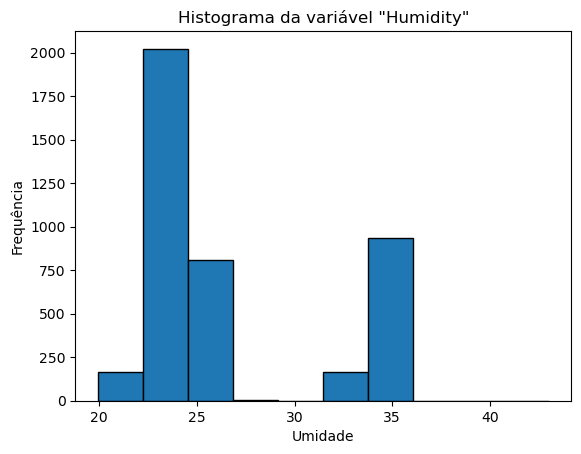

In [7]:
#Histograma da variável "Humidity"
plt.hist(dados['Humidity'], bins=10, edgecolor='black')
plt.xlabel('Umidade')
plt.ylabel('Frequência')
plt.title('Histograma da variável "Humidity"')
plt.show()

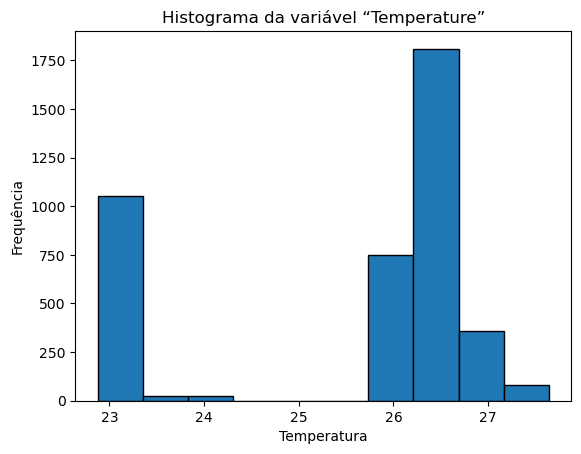

In [8]:
#Histograma da variável “Temperature”
plt.hist(dados['Temperature'], bins=10, edgecolor='black')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.title('Histograma da variável “Temperature”')
plt.show()

# 4)Apresentação da evolução por minuto da variável “Pressure”.

In [9]:
dados['Datetime'] = pd.to_datetime(dados['Datetime'])
dados['Hour'] = dados['Datetime'].dt.hour
dados['Minute'] = dados['Datetime'].dt.minute
grouped = dados.groupby(['Hour', 'Minute'])['Pressure'].mean().reset_index()

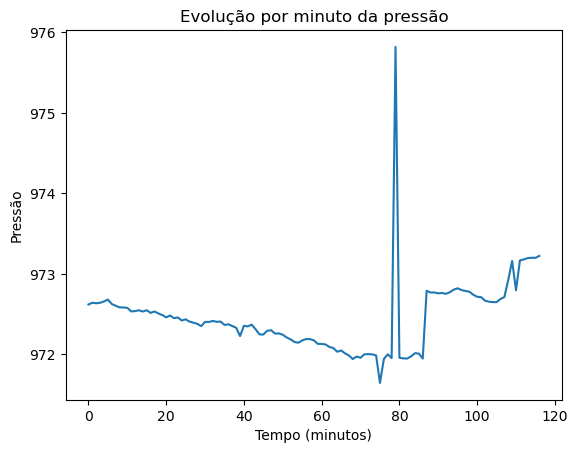

In [10]:
#Geração da visualização
plt.plot(grouped.index, grouped['Pressure'])
plt.xlabel('Tempo (minutos)')
plt.ylabel('Pressão')
plt.title('Evolução por minuto da pressão')
plt.show()

# 5)Criação de uma função de filtro que elimina as observações com as 5% maiores leituras e as 5% menores leituras das colunas referentes aos dados coletados pelos sensores de temperatura e umidade.


In [11]:
#Função de filtro para eliminar as observações com as 5% maiores e menores leituras de temperatura e umidade

def filter_outliers(dados, columns):
    filtered_dados = dados.copy()
    
    for column in columns:
        lower_threshold = dados[column].quantile(0.05)
        upper_threshold = dados[column].quantile(0.95)
        
        filtered_dados = filtered_dados[(filtered_dados[column] >= lower_threshold) & (filtered_dados[column] \
                                                                                       <= upper_threshold)]
    
    return filtered_dados

# 6)Criação e apresentação de novos histogramas dos dados das colunas temperatura e umidade, após a operação de limpeza do item 5.


In [12]:
#Aplicação o filtro às colunas de temperatura e umidade
filtered_data = filter_outliers(dados, ['Temperature', 'Humidity'])


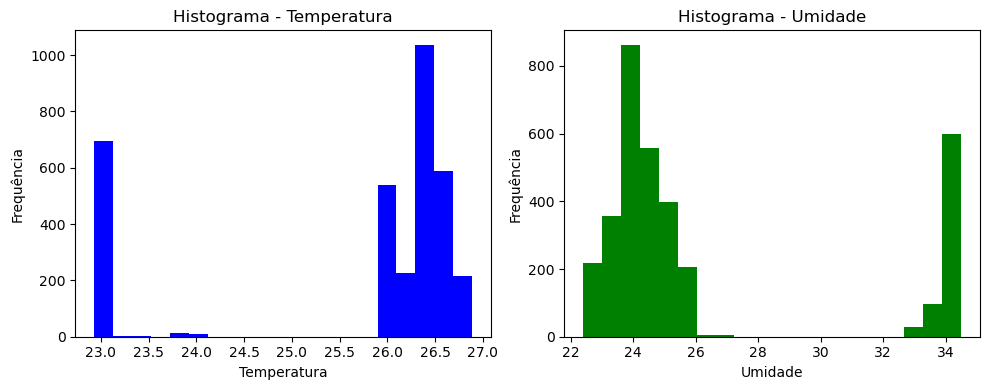

In [13]:
#Plotagem histogramas das colunas de temperatura e umidade após a limpeza

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.hist(filtered_data['Humidity'], bins=20, color='green')
plt.title('Histograma - Umidade')
plt.xlabel('Umidade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 1)
plt.hist(filtered_data['Temperature'], bins=20, color='blue')
plt.title('Histograma - Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# 7)Comparação dos histogramas para as duas variáveis.

In [ ]:
"""
Ambos os histogramas possuem frequência acima de 200 quando a temperatura está em 23, 26.5 e 27, e quando
a umidade está em 23%, 24%, 25%, 26% e 34%. A frequência máxima da temperatura é em torno de 1000, enquanto
a frequência da umidade é em torno de 800. Em minha opinião, ambos os histogramas apresentam frequências
muito diferentes, com exceção da frequência atingida na temperatura de 26.5 e na umidade de 34%
'"""

# 8)Explição do impacto da eliminação de dados extremos para cada uma das variáveis envolvidas.

In [ ]:
"""
Após a eliminação dos dados extremos, é possível notar uma diminuição drástica da frequência máxima
nos histogramas de temperatura e umidade. Também é possível notar a desfragmentação de colunas com baixa
frequência em ambos os histogramas de umidade e temperatura.
"""

# 9)Apresentação das diferenças entre as métricas de avaliação do problema de associações, chamadas Suporte, Confiança e Lift.

In [ ]:
"""
O suporte mostra a frequência de ocorrência de um conjunto de itens, a confiança mede a força da associação
entre dois conjuntos de itens e o lift compara a probabilidade de ocorrência conjunta dos conjuntos de itens
com a probabilidade esperada. 
"""

# 10)Em um problema de associações, qual a métrica mais utilizada para estabelecer a chamada “poda” do algoritmo?

In [ ]:
"""
A métrica mais utilizada para estabelecer a "poda" em um algoritmo de associação é o suporte mínimo.
Essa métrica define um limite mínimo de ocorrência para os conjuntos de itens considerados relevantes.
"""

# 11)Como é o formato obrigatório de uma base de dados que será processada pelo algoritmo Apriori para revelar relacionamentos entre consumo de produtos?

In [ ]:
"""
Para o algoritmo Apriori identificar relacionamentos de consumo de produtos, a base de dados deve ser
organizada em transações. Cada linha da base de dados representa uma compra e os itens comprados são
listados nessa linha. O algoritmo analisa essas transações e descobre quais itens são frequentemente
comprados juntos, ajudando a revelar padrões de consumo. 
"""

# 12)Um algoritmo de associações, como o Apriori, pode ser utilizado para problemas supervisionados de classificação? 

In [ ]:
"""
Não, o algoritmo de associações, como o Apriori, não é adequado para problemas supervisionados de
classificação. Ele é principalmente utilizado para descobrir padrões e relacionamentos entre itens
em uma base de dados de transações. O Apriori é útil para recomendações de produtos ou análise de
cestas de compras.
"""

# 13)Explicação da diferença entre os algoritmos de Agrupamentos e Classificação.

In [ ]:
"""
O agrupamento encontra grupos semelhantes nos dados, enquanto a classificação atribui uma
classe a novos dados com base em exemplos previamente rotulados.
"""

# 14)Apresentação de três limitações do algoritmo de agrupamentos chamado K-Means.

In [ ]:
"""
O algoritmo de agrupamento K-Means possui algumas limitações:

-->Sensibilidade a valores iniciais: O K-Means é sensível aos valores iniciais dos centróides. 
Isso significa que diferentes inicializações podem resultar em diferentes soluções de agrupamento. 


-->Determinação do número de clusters: O K-Means requer que o número de clusters seja especificado
antes da execução do algoritmo

-->Sensibilidade a outliers: O K-Means é sensível a outliers, que são pontos de dados que estão muito
distantes dos demais. Esses outliers podem distorcer a localização dos centróides e afetar a formação
dos clusters.
"""

# 15)Utilização da base que pode ser encontrada em <https://archive.ics.uci.edu/ml/datasets/Wine> e estabelecimento  de um número ideal de grupos para o problema.

In [14]:
#Carregamento do arquivo
dados2 = pd.read_csv('/home/r/Documentos/Infnet/Machine Learning e modelos não-supervisionados/PROJETO/wine.data',
                    header=None)

In [15]:
#Normalização
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados2_norm = scaler.fit_transform(dados2)

In [16]:
#Utilização do Kmeans
from sklearn.cluster import KMeans

inertia = []
num_clusters = np.arange(1, 14)

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(dados2_norm)
    inertia.append(model.inertia_)

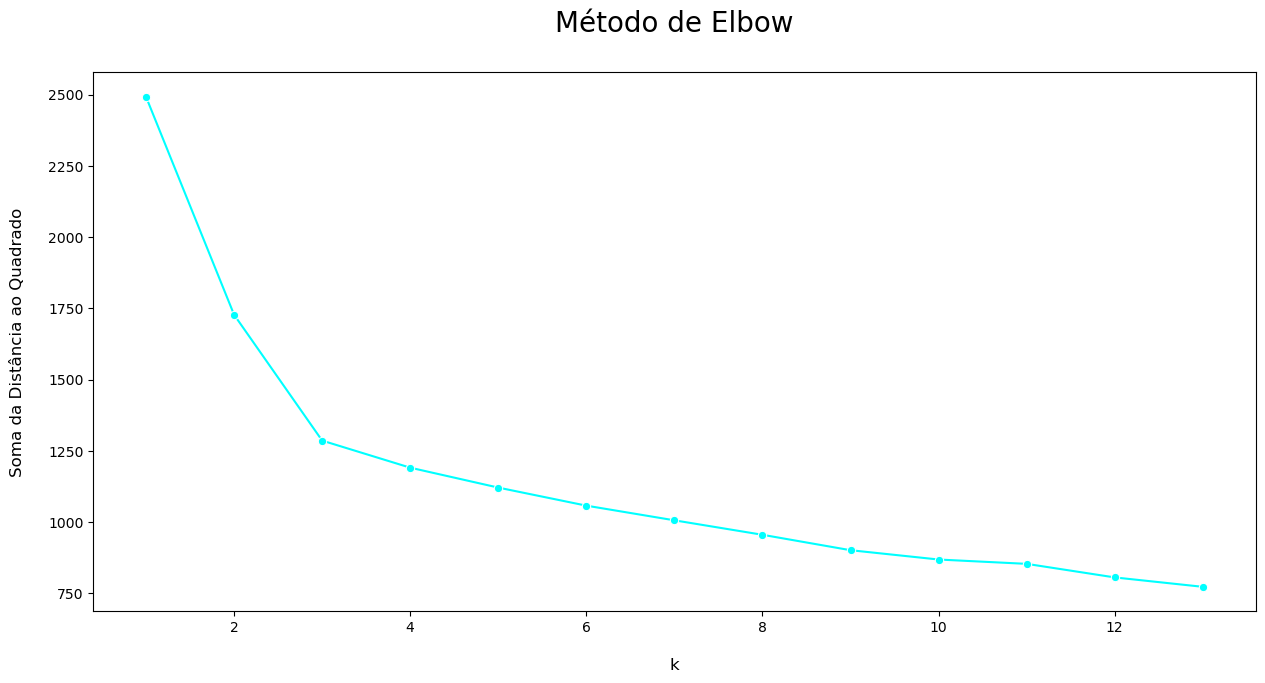

In [17]:
#Método de Elbow
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.lineplot(x=num_clusters, y=inertia, color="aqua", marker="o")
plt.xlabel("\nk", size=12)
plt.ylabel("Soma da Distância ao Quadrado\n", size=12)
plt.title("Método de Elbow\n", size=20)
plt.show()

In [18]:
#Estabelecimento do número ideal de grupos de forma automática
from kneed import KneeLocator

In [19]:
kl = KneeLocator(num_clusters, inertia, curve='convex', direction='decreasing')

In [20]:
kl.elbow

3

In [ ]:
"""
A partir do KneeLocator foi possível estabelecer o número ideal de grupos, que no caso seriam 3.
"""

# 16)Utilização da mesma base do item anterior para aplicação do algoritmo de agrupamentos K-Means. 

In [21]:
#Utilização do Kmeans com o valor de grupos definido
modelo = KMeans(n_clusters = 3)

In [22]:
clusters = modelo.fit_predict(dados2_norm)

In [23]:
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


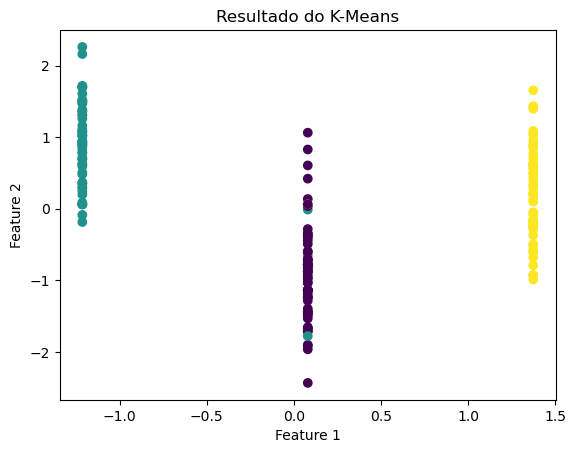

In [24]:
#Plotagem dos pontos de dados com cores correspondentes aos clusters
plt.scatter(dados2_norm[:, 0], dados2_norm[:, 1], c=clusters)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Resultado do K-Means')
plt.show()